**Домашнее задание "Продвинутая оптимизация".**

**Задание**\
При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: strategy, popsize, mutation.

Постройте графики количества итераций (nit) оптимизации функции ackley от значения параметра.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

In [3]:
bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

Поэкспериментируем с параметром tol (точность):

In [4]:
tol = np.random.uniform(low = 0, high = 1, size = (15,))  # случайным образом назначим несколько значений для параметра tol
nit_list = [] #создадим список для записи значений кол-ва итераций в зависимости от параметра tol
success_list = [] #список для проверки успешности функции
for i in range(0, len(tol)):
    result = differential_evolution(ackley, bounds, seed=42, tol = tol[i])
    success_list.append(result['success'])
    nit_list.append(result['nit'])

print(tol)
print(success_list)
print(nit_list)


[0.53734165 0.50655404 0.81203498 0.11862241 0.81350046 0.1390681
 0.320029   0.71648339 0.94190777 0.30927696 0.79912887 0.00890083
 0.08439907 0.33250996 0.89570108]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[1, 1, 1, 90, 1, 90, 1, 1, 1, 90, 1, 90, 90, 1, 1]


Построим график:

<function matplotlib.pyplot.show(*args, **kw)>

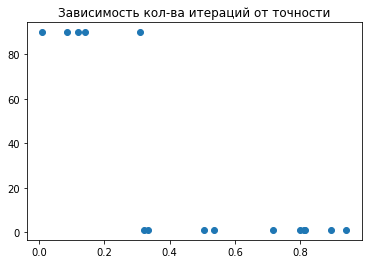

In [5]:
x = tol
y = nit_list
plt.scatter(x,y)
plt.title('Зависимость кол-ва итераций от точности')
plt.show

По данным выше и графику видно, что nit = 1, если показатель tol близок к 1  и nit = 90, если tol близок к 0.

Теперь попробуем поэкспериментировать с параметром recombination (in range [0,1]), при этом мы укажем параметр tol = 0.5:

In [ ]:
rec_list = [1, 0.5, 0.1, 0.001, 0.0001, 0]  #методом тыка назначим несколько значений для параметра recombination
nit_list = [] #создадим список для записи значений кол-ва итераций в зависимости от параметра recombination
success_list = [] #список для проверки успешности функции

for i in range(0, len(rec_list)):
    result = differential_evolution(ackley, bounds, seed=42, tol = 0.5, recombination = rec_list[i])
    success_list.append(result['success'])
    nit_list.append(result['nit'])

print(rec_list)
print(success_list)
print(nit_list)

[1, 0.5, 0.1, 0.001, 0.0001, 0]
[True, True, True, True, True, True]
[1, 1, 1, 1, 1, 1]


По резульатам этого эксперимента, количество итерации не зависит от параметра recombination, при tol = 0.5

А если не указывать tol = 0.5

In [ ]:
rec_list = [1, 0.85, 0.75, 0.5, 0.25, 0.1, 0.001, 0.0001, 0]  #методом тыка назначим несколько значений для параметра recombination
nit_list = [] #создадим список для записи значений кол-ва итераций в зависимости от параметра recombination
success_list = [] #список для проверки успешности функции

for i in range(0, len(rec_list)):
    result = differential_evolution(ackley, bounds, seed=42, recombination = rec_list[i])
    success_list.append(result['success'])
    nit_list.append(result['nit'])

print(rec_list)
print(success_list)
print(nit_list)

[1, 0.85, 0.75, 0.5, 0.25, 0.1, 0.001, 0.0001, 0]
[True, True, True, True, True, True, True, True, True]
[82, 85, 90, 107, 116, 126, 111, 111, 111]


<function matplotlib.pyplot.show(*args, **kw)>

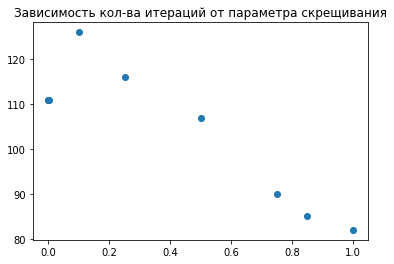

In [ ]:
x = rec_list
y = nit_list
plt.scatter(x,y)
plt.title('Зависимость кол-ва итераций от параметра скрещивания')
plt.show

Меньшее количество итераций получается при recombination = 1, меньше, чем в случае, когда мы не назначали параметры специально.

Проверим параметр strategy

In [ ]:
strat_list = ['best1bin','best1exp','rand1exp','randtobest1exp','currenttobest1exp','best2exp',
              'rand2exp','randtobest1bin','currenttobest1bin','best2bin','rand2bin','rand1bin']  #назначим все возможные значения для параметра strategy
nit_list = [] #создадим список для записи значений кол-ва итераций в зависимости от параметра strategy
success_list = [] #список для проверки успешности функции

for i in range(0, len(strat_list)):
    result = differential_evolution(ackley, bounds, seed=42, strategy = strat_list[i])
    success_list.append(result['success'])
    nit_list.append(result['nit'])

print(strat_list)
print(success_list)
print(nit_list)

['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
[True, True, True, True, False, True, True, True, False, True, True, True]
[90, 147, 246, 156, 1000, 244, 341, 101, 1000, 166, 232, 168]


Во-первых, видно, что не все стратегии справляются, а во-вторых, наиболее оптимальной в данном случае является первая 'best1bin' (указываемая по умолчанию).

<function matplotlib.pyplot.show(*args, **kw)>

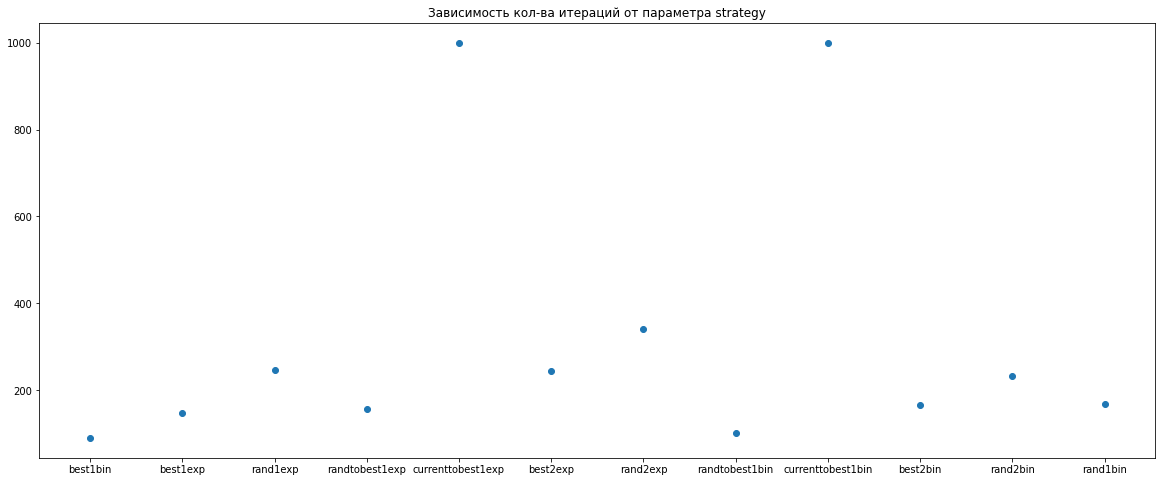

In [ ]:
plt.figure(figsize=(20, 8))

x = strat_list
y = nit_list
plt.scatter(x,y)
plt.title('Зависимость кол-ва итераций от параметра strategy')
plt.show

Поэкспериментируем с параметром mutation (в диапазоне [0,2])

In [ ]:
mut = np.random.uniform(low = 0, high = 2, size = (15,))  #случайным образом назначим несколько значений для параметра mutation
nit_list = [] #создадим список для записи значений кол-ва итераций в зависимости от параметра mutation
success_list = [] #список для проверки успешности функции

for i in range(0, len(mut)):
    result = differential_evolution(ackley, bounds, seed=42, mutation = mut[i])
    success_list.append(result['success'])
    nit_list.append(result['nit'])

print(mut)
print(success_list)
print(nit_list)

[3.22671732e-01 1.10845580e+00 1.82364203e+00 1.71420763e-01
 2.49604870e-01 1.39925044e+00 1.89892148e-02 9.38493601e-01
 2.02653318e-01 1.28809524e+00 4.55840217e-01 1.15110188e-03
 1.96353181e+00 2.11814246e-01 6.91692629e-01]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[40, 176, 351, 26, 32, 261, 4, 139, 29, 225, 52, 3, 324, 32, 93]


<function matplotlib.pyplot.show(*args, **kw)>

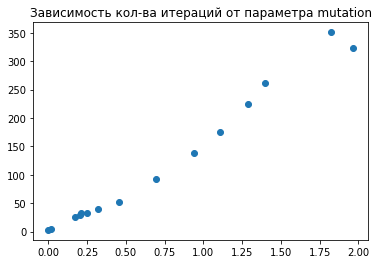

In [ ]:
x = mut
y = nit_list
plt.scatter(x,y)
plt.title('Зависимость кол-ва итераций от параметра mutation')
plt.show

Количество итераций сильно снижается, если параметр mutation = 0 или очень близок к 0. При этом зависимость нелинейная.

**Дополнительное задание**\
Поэкспериментируйте с параметрами и оптимизацией через minimize:

In [6]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m
     

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [16]:
xtol = np.random.uniform(low = 0, high = 1, size = (15,))  # случайным образом назначим несколько значений для параметра xtol
nfev_list = [] #создадим список для записи значений кол-ва обращений в зависимости от параметра
nit_list = [] #создадим список для записи значений кол-ва итераций в зависимости от параметра tol
success_list = [] #список для проверки успешности функции
x0 = [0,0]

xtol = np.append(xtol, [1e-8, 1e-15, 1e-3]) # добавим несколько значений вручную

for i in range(0, len(xtol)):
    result_m = minimize(ackley, x0,  method='Nelder-Mead', options={'xtol':xtol[i]})
    success_list.append(result_m['success'])
    nfev_list.append(result_m['nfev'])
    nit_list.append(result_m['nit'])

print(tol)
print(success_list)
print(nfev_list)
print(nit_list)

[0.73420878 0.42968086 0.93266819 0.78690231 0.03228971 0.35376824
 0.92728938 0.70265759 0.10130654 0.51036233 0.46135822 0.42327408
 0.92048336 0.96346158 0.46133512]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 63, 158, 17]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 31, 78, 8]


При значении точности очень близкому к нулю кол-во итераций и обращений увеличивается, в остальных случаях не меняется.

Попробуем метод сопряженных направлений Пауэлла

In [17]:
x0 = [0,0]

result_m = minimize(ackley, x0,  method = 'Powell')
result_m

   direc: array([[1., 0.],
       [0., 1.]])
     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 1
  status: 0
 success: True
       x: array([0., 0.])

По количеству итерации наиболее эффективным оказался метод 'Powell'. А по количеству обращений метод 'Nelder-Mead'.